In [6]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:44637")
client

Client Scheduler: tcp://127.0.0.1:44637 Dashboard: http://127.0.0.1:34183/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [11]:
import dask.array as da
import xarray as xr
x = da.random.random((10000,10000),chunks='16MiB')
x

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1250, 1250), chunktype=numpy.ndarray>

In [10]:
y = (x + x.T) - x.mean(axis=0)
y.sum().compute()

49996215.21753314

In [26]:
ds_in = xr.open_mfdataset('/dx07/tylerj/CMIP5_output/abrupt4xCO2/thetao_Omon_CNRM-CM5-2*',parallel=True)

/home/tylerj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/tylerj/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  from_openmfds=True,


In [31]:
out = ds_in.thetao.sum(dim='lev').compute()

In [38]:
out.nbytes / 2**20

483.87451171875

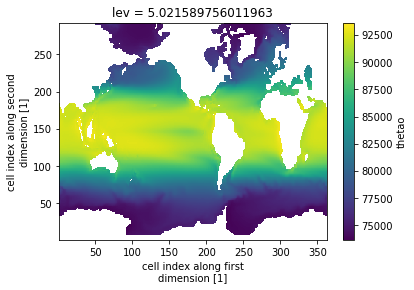

In [23]:
out.isel(lev=0).plot()